In this section, we import the required libraries and create a sample dataset. The dataset includes data on automobile sales, vehicle types, economic indicators (GDP, unemployment rate), recession flags, and advertising spend.
Note: The data is simulated for demonstration purposes.

In [1]:
# Code Cell 0: Importing libraries and creating a sample dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# For inline plotting in the notebook
%matplotlib inline

# Set seed for reproducibility
np.random.seed(42)

# Create an array of years
years = np.arange(2000, 2021)

# Define vehicle types
vehicle_types = ['Sedan', 'SUV', 'Truck', 'Coupe']

# Create simulated data
data = {
    'Year': np.repeat(years, len(vehicle_types)),
    'VehicleType': vehicle_types * len(years),
    'Sales': np.random.randint(50, 300, size=len(years) * len(vehicle_types)),
    # Assume that years 2008, 2009, and 2020 are recession years (1) and the others are not (0)
    'Recession': [1 if year in [2008, 2009, 2020] else 0 for year in np.repeat(years, len(vehicle_types))],
    'GDP': np.random.uniform(500, 1000, size=len(years) * len(vehicle_types)),
    # Assign seasons cyclically
    'Season': np.tile(['Spring', 'Summer', 'Autumn', 'Winter'], int(np.ceil(len(years) * len(vehicle_types) / 4)))[:len(years) * len(vehicle_types)],
    'AvgPrice': np.random.uniform(20000, 50000, size=len(years) * len(vehicle_types)),
    'SalesVolume': np.random.randint(100, 500, size=len(years) * len(vehicle_types)),
    'Unemployment': np.random.uniform(3, 10, size=len(years) * len(vehicle_types))
}

# Create the DataFrame
df = pd.DataFrame(data)

# Add a column for advertising spend (random values)
df['AdvertisingSpend'] = np.random.uniform(10000, 50000, size=len(df))

# Add a column for company, simulating that about 50% of the records are for XYZAutomotives
companies = ['XYZAutomotives', 'Other']
df['Company'] = np.random.choice(companies, size=len(df), p=[0.5, 0.5])

# Display the first few rows of the DataFrame
df.head()


,Year,VehicleType,Sales,Recession,GDP,Season,AvgPrice,SalesVolume,Unemployment,AdvertisingSpend,Company
0,2000,Sedan,152,0,629.389991,Spring,20208.563916,307,7.917389,44259.593648,Other
1,2000,SUV,229,0,831.261142,Summer,35322.419077,268,5.516438,36347.745265,XYZAutomotives
2,2000,Truck,142,0,655.855538,Autumn,32522.330094,260,5.055143,16517.377083,Other
3,2000,Coupe,64,0,760.034011,Winter,26663.234314,167,8.665528,12822.749896,Other
4,2001,Sedan,156,0,773.355140,Spring,23595.961020,388,8.670794,35696.771128,XYZAutomotives


We use the built-in plotting function of pandas to create a line chart that shows the total automobile sales by year.

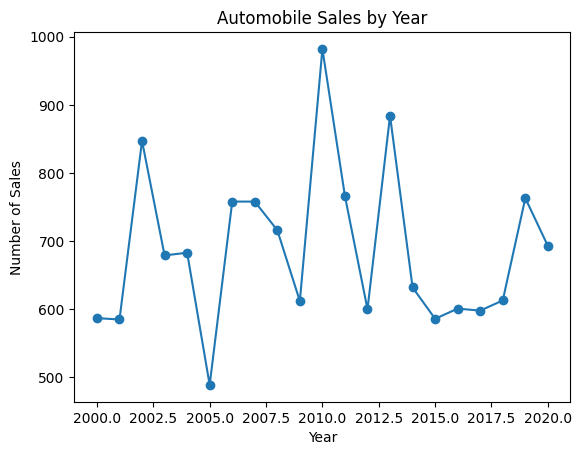

In [2]:
# Code Cell 1.1
# Aggregate sales by year
sales_by_year = df.groupby('Year')['Sales'].sum()

# Create a line chart using pandas plotting
sales_by_year.plot(kind='line', marker='o', title='Automobile Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()


We create a line chart to display the sales trend for each vehicle type. This helps to analyze if there is a notable difference in sales trends among the various vehicle types during recession periods.

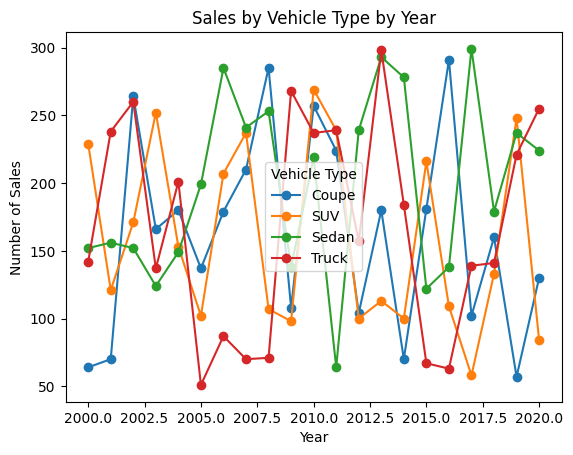

In [3]:
# Code Cell 1.2
# Create a pivot table to have sales by vehicle type for each year
sales_by_year_type = df.pivot_table(index='Year', columns='VehicleType', values='Sales', aggfunc='sum')

# Plot a line chart for each vehicle type
sales_by_year_type.plot(kind='line', marker='o', title="Sales by Vehicle Type by Year")
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.legend(title='Vehicle Type')
plt.show()


Using Seaborn, we create a visualization that compares the sales trends by vehicle type in two scenarios: during recession periods and during non-recession periods.

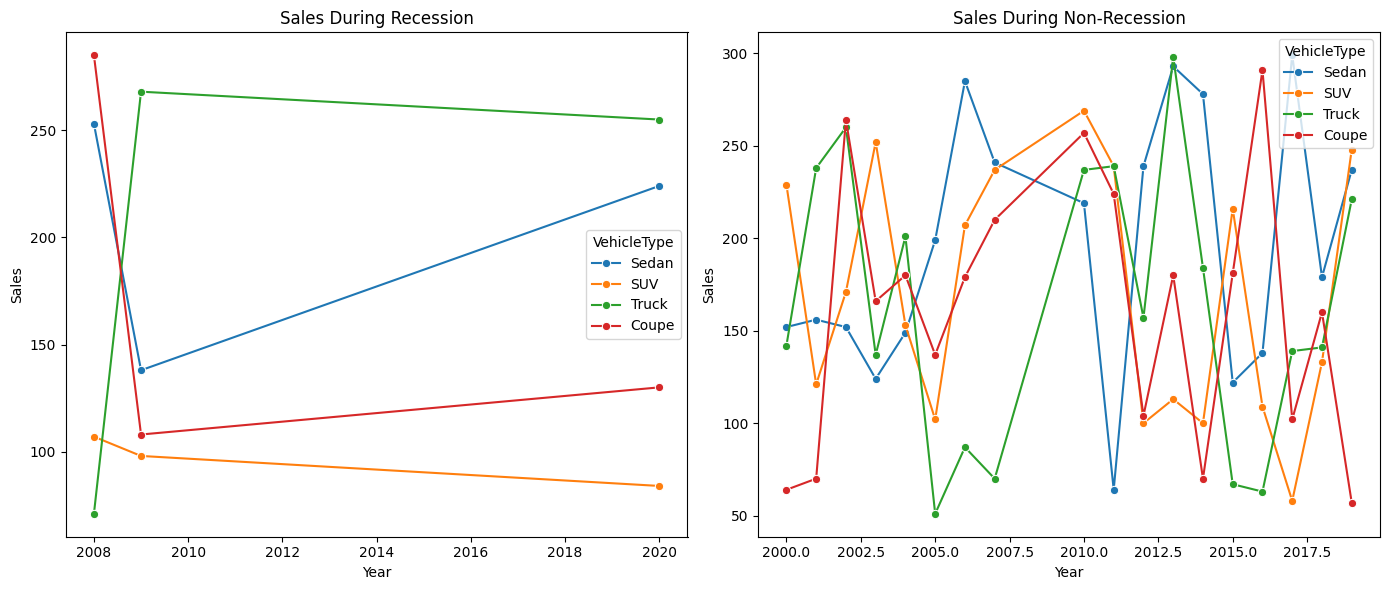

In [4]:
# Code Cell 1.3
# Create two subsets: one for recession periods and one for non-recession periods
df_recession = df[df['Recession'] == 1]
df_non_recession = df[df['Recession'] == 0]

plt.figure(figsize=(14,6))

# Plot for recession period
plt.subplot(1, 2, 1)
sns.lineplot(data=df_recession, x='Year', y='Sales', hue='VehicleType', marker='o')
plt.title("Sales During Recession")
plt.xlabel("Year")
plt.ylabel("Sales")

# Plot for non-recession period
plt.subplot(1, 2, 2)
sns.lineplot(data=df_non_recession, x='Year', y='Sales', hue='VehicleType', marker='o')
plt.title("Sales During Non-Recession")
plt.xlabel("Year")
plt.ylabel("Sales")

plt.tight_layout()
plt.show()


We compare the average GDP trends during recession and non-recession periods using two separate line charts in subplots.

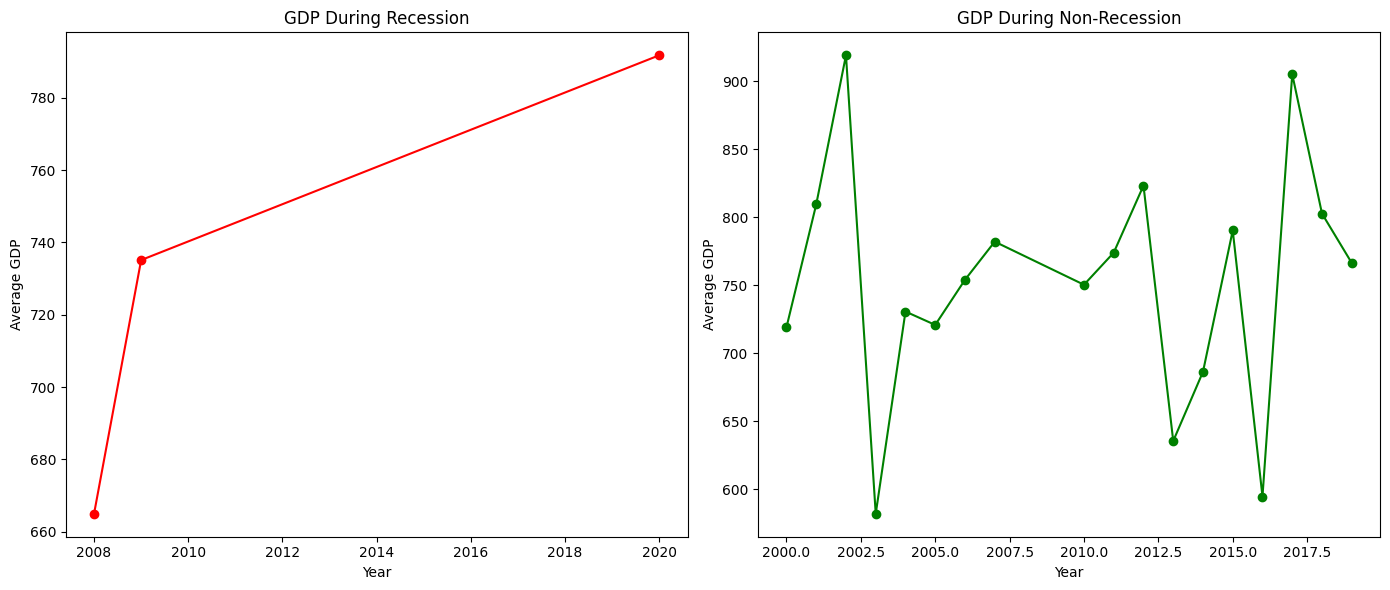

In [5]:
# Code Cell 1.4
# Calculate the average GDP per year and by recession status
gdp_by_year = df.groupby(['Year', 'Recession'])['GDP'].mean().reset_index()

# Separate the data for recession and non-recession
gdp_recession = gdp_by_year[gdp_by_year['Recession'] == 1]
gdp_non_recession = gdp_by_year[gdp_by_year['Recession'] == 0]

plt.figure(figsize=(14,6))

# Subplot for recession period
plt.subplot(1, 2, 1)
plt.plot(gdp_recession['Year'], gdp_recession['GDP'], marker='o', color='red')
plt.title("GDP During Recession")
plt.xlabel("Year")
plt.ylabel("Average GDP")

# Subplot for non-recession period
plt.subplot(1, 2, 2)
plt.plot(gdp_non_recession['Year'], gdp_non_recession['GDP'], marker='o', color='green')
plt.title("GDP During Non-Recession")
plt.xlabel("Year")
plt.ylabel("Average GDP")

plt.tight_layout()
plt.show()


We create a bubble chart to visualize how seasonality affects total automobile sales. The size of each bubble represents the aggregated sales volume for each season.

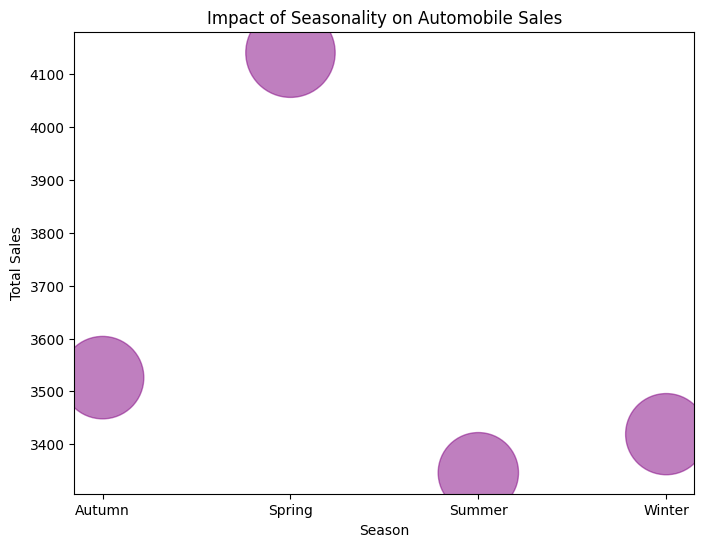

In [6]:
# Code Cell 1.5
# Aggregate sales by season
sales_by_season = df.groupby('Season')['Sales'].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(sales_by_season['Season'], sales_by_season['Sales'], 
            s=sales_by_season['Sales'], alpha=0.5, color='purple')
plt.title("Impact of Seasonality on Automobile Sales")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.show()


We analyze the correlation between the average price of vehicles and the sales volume during recession periods using a scatter plot.

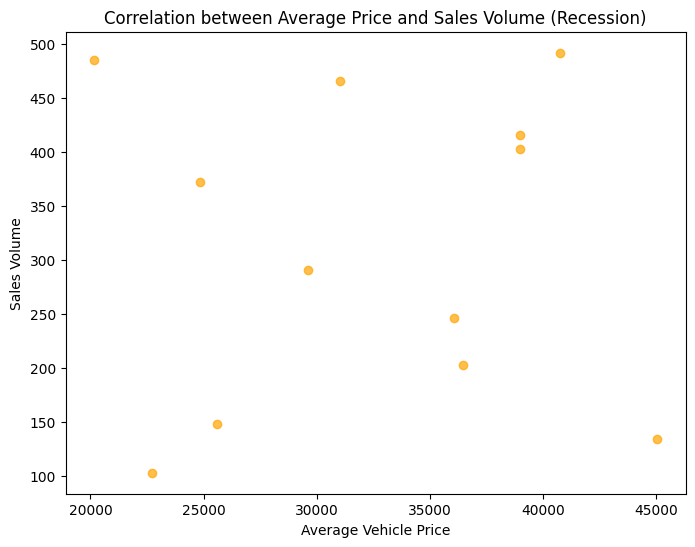

In [7]:
# Code Cell 1.6
# Filter the data for recession periods
df_recession = df[df['Recession'] == 1]

plt.figure(figsize=(8,6))
plt.scatter(df_recession['AvgPrice'], df_recession['SalesVolume'], alpha=0.7, color='orange')
plt.title("Correlation between Average Price and Sales Volume (Recession)")
plt.xlabel("Average Vehicle Price")
plt.ylabel("Sales Volume")
plt.show()


We create a pie chart to visualize the share of advertising spend for XYZAutomotives during recession versus non-recession periods.

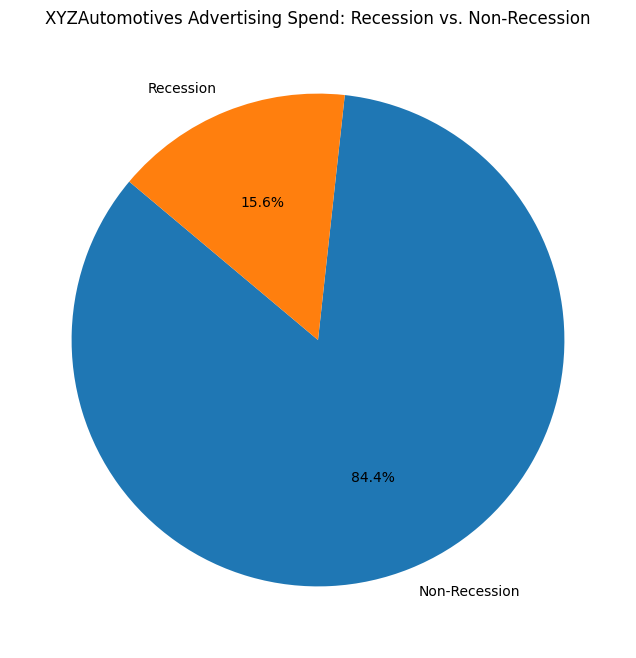

In [8]:
# Code Cell 1.7
# Filter data for XYZAutomotives
df_xyz = df[df['Company'] == 'XYZAutomotives']

# Group advertising spend by recession status
advertising_by_recession = df_xyz.groupby('Recession')['AdvertisingSpend'].sum()

# Create labels for the pie chart
labels = ['Recession' if r == 1 else 'Non-Recession' for r in advertising_by_recession.index]

plt.figure(figsize=(8,8))
plt.pie(advertising_by_recession, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("XYZAutomotives Advertising Spend: Recession vs. Non-Recession")
plt.show()


We display a pie chart showing the total advertising spend for each vehicle type during the recession period.

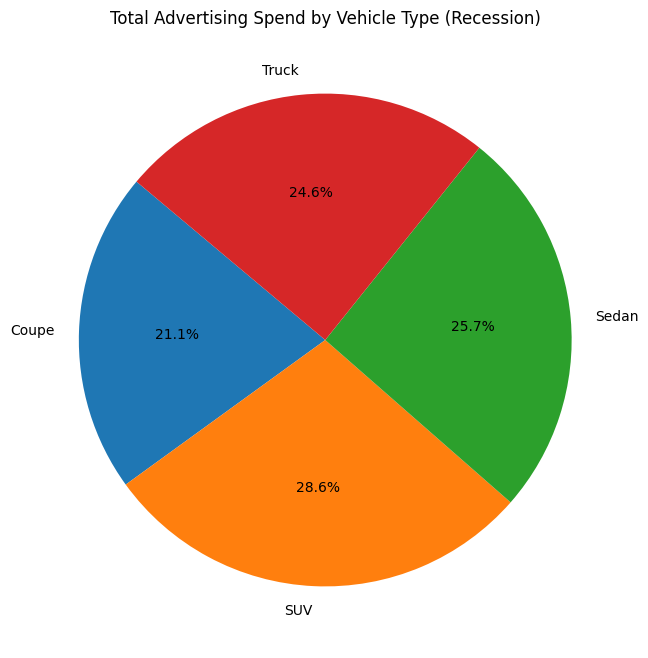

In [9]:
# Code Cell 1.8
# Filter data for the recession period and group by vehicle type
advertising_by_vehicle = df[df['Recession'] == 1].groupby('VehicleType')['AdvertisingSpend'].sum()

plt.figure(figsize=(8,8))
plt.pie(advertising_by_vehicle, labels=advertising_by_vehicle.index, autopct='%1.1f%%', startangle=140)
plt.title("Total Advertising Spend by Vehicle Type (Recession)")
plt.show()


We analyze the effect of the unemployment rate on sales, broken down by vehicle type during recession periods. For each vehicle type, we create a line chart that shows both the sales (left axis) and the unemployment rate (right axis).

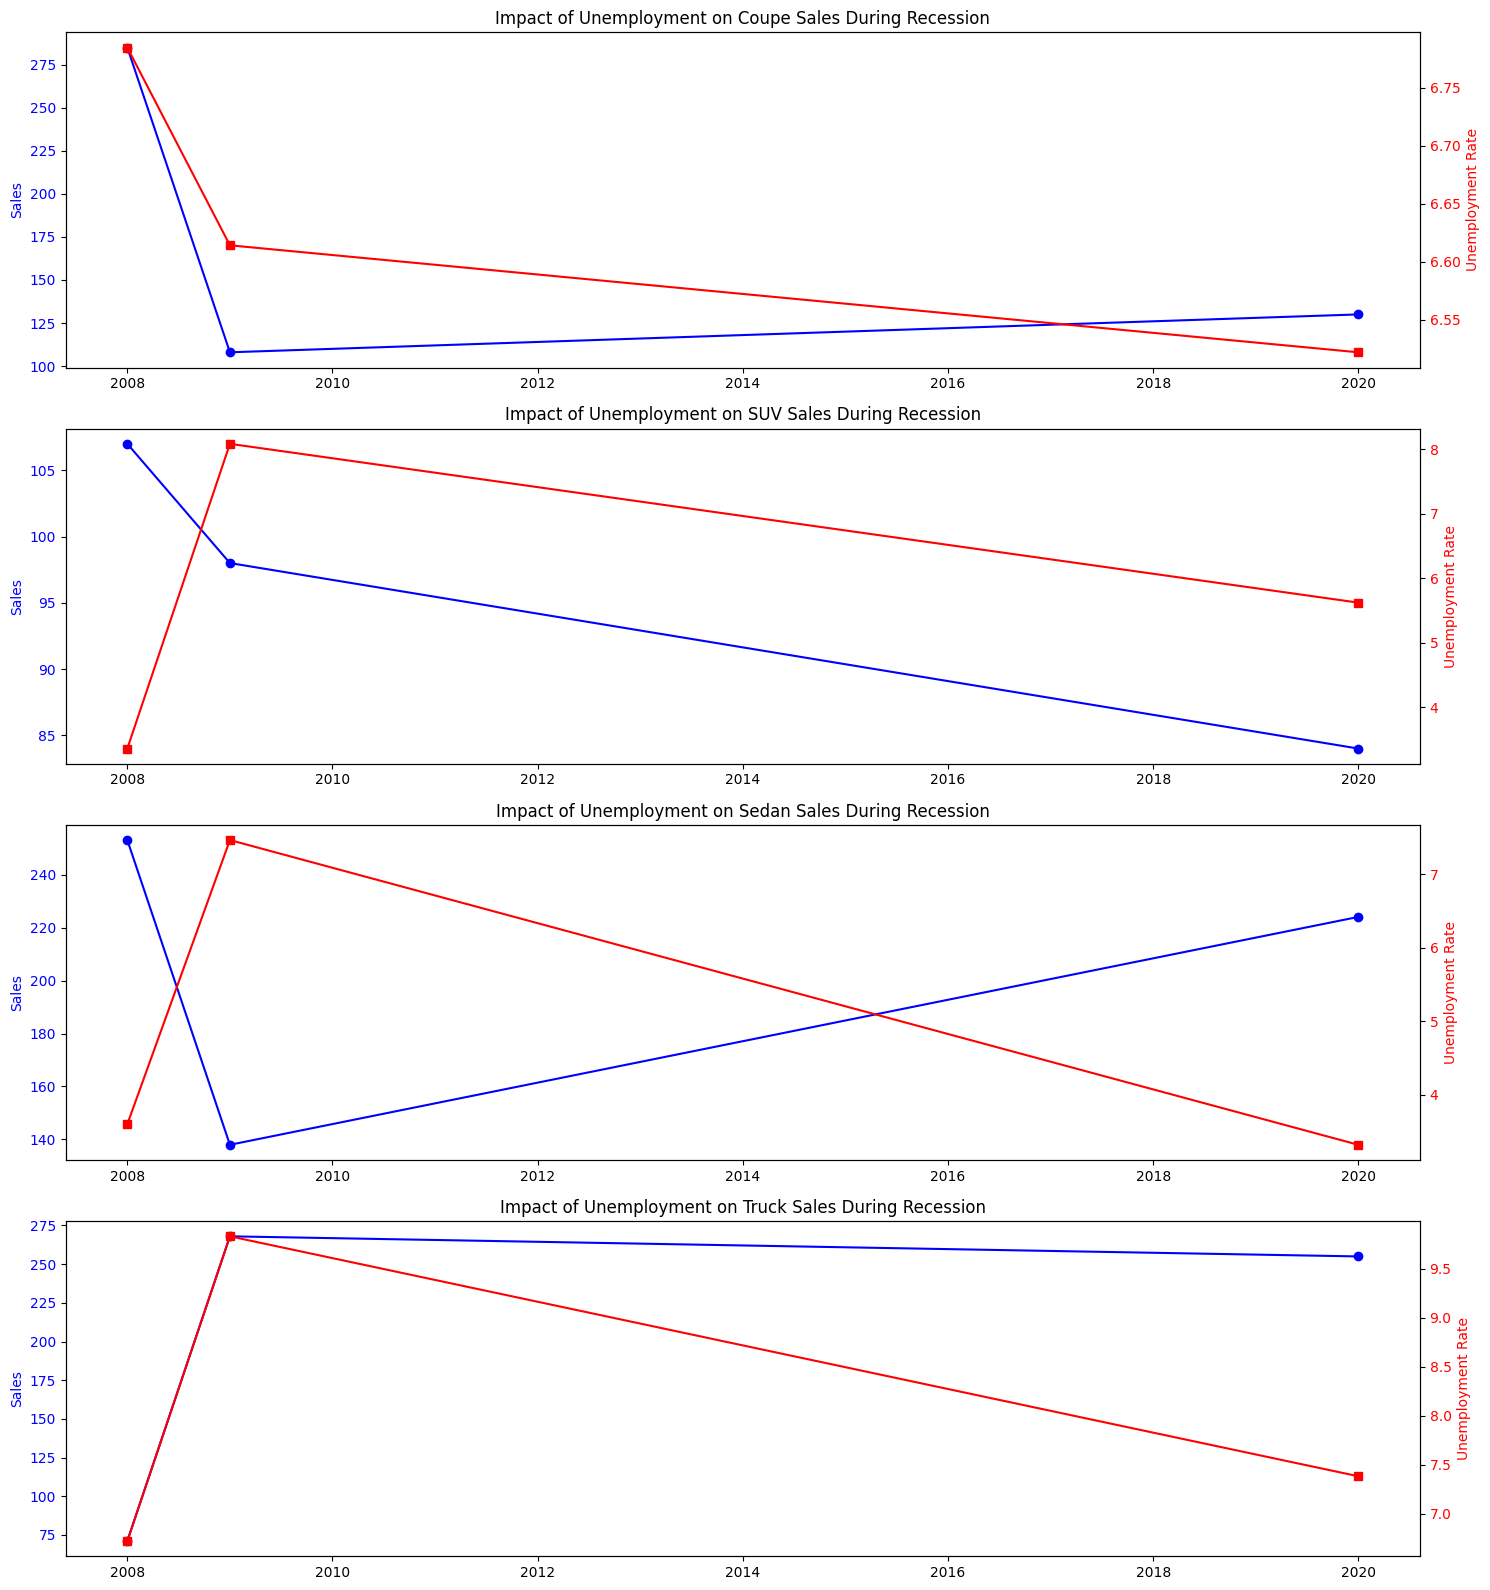

In [10]:
# Code Cell 1.9
# Filter the data for recession periods
df_recession = df[df['Recession'] == 1]

# Aggregate: for each year and vehicle type, sum the sales and calculate the mean unemployment rate
agg_data = df_recession.groupby(['Year', 'VehicleType']).agg({'Sales': 'sum', 'Unemployment': 'mean'}).reset_index()

# List of unique vehicle types
vehicle_types_unique = agg_data['VehicleType'].unique()
num_types = len(vehicle_types_unique)

plt.figure(figsize=(15, num_types * 4))
for i, vtype in enumerate(vehicle_types_unique, 1):
    subset = agg_data[agg_data['VehicleType'] == vtype]
    ax1 = plt.subplot(num_types, 1, i)
    ax1.plot(subset['Year'], subset['Sales'], color='blue', marker='o', label='Sales')
    ax1.set_ylabel('Sales', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Secondary axis for unemployment rate
    ax2 = ax1.twinx()
    ax2.plot(subset['Year'], subset['Unemployment'], color='red', marker='s', label='Unemployment')
    ax2.set_ylabel('Unemployment Rate', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.title(f"Impact of Unemployment on {vtype} Sales During Recession")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


In this section, we develop a Dash application that includes:

A meaningful title.
A dropdown menu to select the type of report (Recession Report or Annual Report).
A division with proper id and classname properties to display output.
A callback function to update the content based on the selected option.
Graphs for the recession report and the annual report, created with Plotly.

In [11]:
# Code Cell 2: Dash Application

# Import the necessary libraries for Dash
import dash
from dash import dcc, html, Input, Output
import plotly.express as px

# Prepare example graphs using Plotly

# Graph for the Recession Report: Aggregate sales during recession periods
df_recession = df[df['Recession'] == 1]
sales_recession = df_recession.groupby('Year')['Sales'].sum().reset_index()
fig_recession = px.line(sales_recession, x='Year', y='Sales',
                        title='Recession Report: Total Sales',
                        markers=True)

# Graph for the Annual Report: Total sales per year (all data)
sales_annual = df.groupby('Year')['Sales'].sum().reset_index()
fig_annual = px.line(sales_annual, x='Year', y='Sales',
                     title='Annual Report: Total Sales',
                     markers=True)

# Create the Dash application
app = dash.Dash(__name__)
app.title = "Dashboard: Recession & Annual Report"  # Meaningful title

# Define the layout of the application
app.layout = html.Div(className="app-container", children=[
    html.H1("Dashboard for Recession and Annual Reports"),
    
    # Dropdown menu for selecting the report type (Task 2.2)
    html.Div([
        html.Label("Select Report Type:"),
        dcc.Dropdown(
            id='report-dropdown',
            options=[
                {'label': 'Recession Report', 'value': 'recession'},
                {'label': 'Annual Report', 'value': 'annual'}
            ],
            value='recession'
        )
    ], style={'width': '50%', 'display': 'inline-block', 'padding': '10px'}),
    
    # Division for displaying output (Task 2.3)
    html.Div(id='output-container', className='output-container', children=[
        # Content will be updated by the callback
    ])
])

# Callback to update the content based on the dropdown selection (Task 2.4)
@app.callback(
    Output('output-container', 'children'),
    Input('report-dropdown', 'value')
)
def update_output(selected_report):
    if selected_report == 'recession':
        # Display statistics for the recession report (Task 2.5)
        return html.Div([
            html.H2("Recession Report"),
            dcc.Graph(figure=fig_recession)
        ])
    elif selected_report == 'annual':
        # Display statistics for the annual report (Task 2.6)
        return html.Div([
            html.H2("Annual Report"),
            dcc.Graph(figure=fig_annual)
        ])
    else:
        return html.Div("Please select an option from the dropdown.")

# To run the application:
# If you are using a standard environment, run app.run_server(debug=True)
# For Jupyter Notebook, consider using JupyterDash to display the app inline.
if __name__ == '__main__':
    app.run_server(debug=True)
